You can use the Lending ClubLinks to an external site. or Titanic dataset for the following assignment. For the Lending Club dataset, you are trying to prepare data to predict if someone will pay back their loan and for the Titanic dataset, you are trying to prepare data to predict if someone will live or die. In the future, you will be performing predictions, but this assignment is just to understand the basic concepts of machine learning and how to clean data before putting it into a model. Make sure you have read chapters 8, 10, and 11 before answering the following:

(5 pts) In 250-500 words, write a thorough explanation in markdown in your notebook of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. You may need to do additional research on this than what exists in the readings.

# Introduction 


**Machine learning is a powerful tool within the arsenals of many experienced programmers; however, the usefulness of machine learning on a case-to-case basis will vary. I will explore situations where machine learning is optimal and situations where machine learning is not.**


# When to use machine learning


**Starting with when machine learning should be used. Machine learning should be used when a problem involves complex patterns/relationships that are usually difficult to address with rules and logic. These problems include but are not limited to image recognition, natural language processing, and predictive modeling for financial markets which all include large volumes of data and complex relationships. While traditional programming methods have trouble capturing complex relationships, machine learning models can usually excel at identifying patterns.**

**Machine learning is also very useful when a corporate entity would like a system to improve over time. One of the strengths of machine learning is its adaptability. An example of when this adaptability comes into play is in the CRM (customer relationship management) system of large corporations. In this situation, the more customer data that is gathered within the database for the machine learning model, the better the quality of the responses will be; therefore, the system will get better over time which will likely save the corporation money in not upgrading the system as often, but also make the corporation more money by helping the corporate entity support a larger customer base.**


# When not to use machine learning


**While machine learning has a lot of benefits within big data, there are situations where machine learning is not the best option. An obvious example of this is when a problem can be solved using simple straightforward rules or logic. If machine learning is introduced in a scenario like that, it could increase the level of complexity of the problem without reason. Take, for example, tasks like basic arithmetic and sorting algorithms which work without the need for extensive data. Machine learning would not be needed and would likely add unnecessary complexity to the problem.**

**Additionally, if the data that was used to feed a machine learning model was of poor quality, biased, or of small quantity, the machine learning model would likely not perform as well. A lot of machine learning models rely on large data that are unbiased to produce quality results. This leads me to believe that for smaller sets of data, traditional programming approaches would be more appropriate than machine learning.**

**Lastly, machine learning models might not be the best choice in healthcare and/or legal decision-making. This is because some machine learning models are “black-box” in nature. Meaning that there is not a clear path/reason as to why a result is pumped out. This would cause clear issues in industries like healthcare and legal industry because of the need for reasoning.**


# Conclusion


**To conclude, machine learning excels in complex and data-rich problem sets where automation is the best solution, but it can add unnecessary complexity to simple problems, provide low-quality results with less-than-ideal data, and have trouble being implemented in certain industries.**

(6 pts) Perform pre-processing on the dataset. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques. Depending on your dataset you may need to create new columns from the existent data you have.

**2a) Import All Modules**

In [779]:
# Import the required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import seaborn as sns
from time import perf_counter_ns 

**2b) Dataset Examination**

In [780]:
# Import the dataset

titanic_df = pd.read_csv("titanic.csv")

# See the different columns

list(titanic_df.columns.values.tolist())

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [781]:
# See the first 5 in the dataset

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [782]:
# Describe the data

titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [783]:
# View the null values of each column

print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [784]:
# See the amount of (rows, columns) there are
print(titanic_df.shape) 

print("\n")

# See datatype of each column
print(titanic_df.dtypes)

(891, 12)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [785]:
# See the count and datatype of the columns
titanic_df.info()
print('_'*40)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

**2c) Data Preprocessing**

In [786]:
# Prepare data frame into a testing group and a training group to remove biases

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)
for train_indices, test_indices in split.split(titanic_df, titanic_df[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_df.loc[train_indices]
    strat_test_set = titanic_df.loc[test_indices]


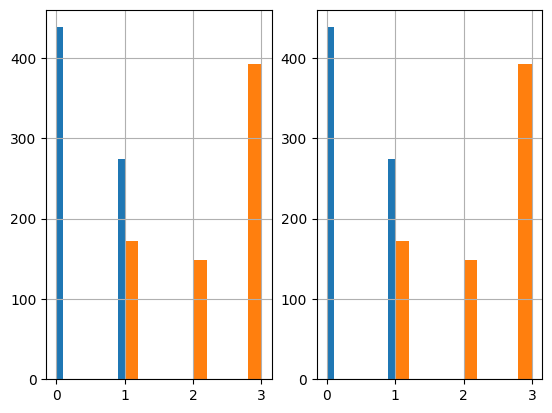

In [787]:
# See if the test group and training group are around the same

plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.show()

In [788]:
# This helps fill in the null values for the 'Age' Column
# The reason we did this for age instead of the other columns is because
# The data missing in the age column is probably more important than the cabin and embarked column.

class AgeImputer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    
    # Actually transforms the value
    def transform(self,X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [789]:
# Add a column that gives numeric value to the embarked column and the sex column using OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()

        column_names = ["C","S","Q","N"]

        for i in range (len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        matrix = encoder.fit_transform(X[['Sex']]).toarray()
    
        column_names = ["Female","Male"]

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        return X

In [790]:
# Remove all the unnecessary columns

class FeatureDropper(BaseEstimator, TransformerMixin):
        
    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N", "PassengerId"], axis = 1, errors ="ignore")


In [791]:
# Pipeline to go through the above code

pipeline = Pipeline([("ageimputer", AgeImputer()),
                     ("featureencoder", FeatureEncoder()),
                     ("featuredropper", FeatureDropper())])

In [792]:
# Call the fit transform features of all the above

strat_train_set = pipeline.fit_transform(strat_train_set)

In [793]:
# See new data frame

strat_train_set

,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
857,1,1,51.000000,0,0,26.5500,0.0,0.0,1.0,0.0,1.0
763,1,1,36.000000,1,2,120.0000,0.0,0.0,1.0,1.0,0.0
865,1,2,42.000000,0,0,13.0000,0.0,0.0,1.0,1.0,0.0
268,1,1,58.000000,0,1,153.4625,0.0,0.0,1.0,1.0,0.0
1,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14,0,3,14.000000,0,0,7.8542,0.0,0.0,1.0,1.0,0.0
545,0,1,64.000000,0,0,26.0000,0.0,0.0,1.0,0.0,1.0
210,0,3,24.000000,0,0,7.0500,0.0,0.0,1.0,0.0,1.0
69,0,3,26.000000,2,0,8.6625,0.0,0.0,1.0,0.0,1.0


In [794]:
# See info

strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 857 to 413
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   C         712 non-null    float64
 7   S         712 non-null    float64
 8   Q         712 non-null    float64
 9   Female    712 non-null    float64
 10  Male      712 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 66.8 KB


(3 pts) Create a correlation matrix with a heatmap for the features. Use markdown to write about your takeaways in under 200 words. Perform feature selection from this. You should likely not be selecting more than 10 features. 

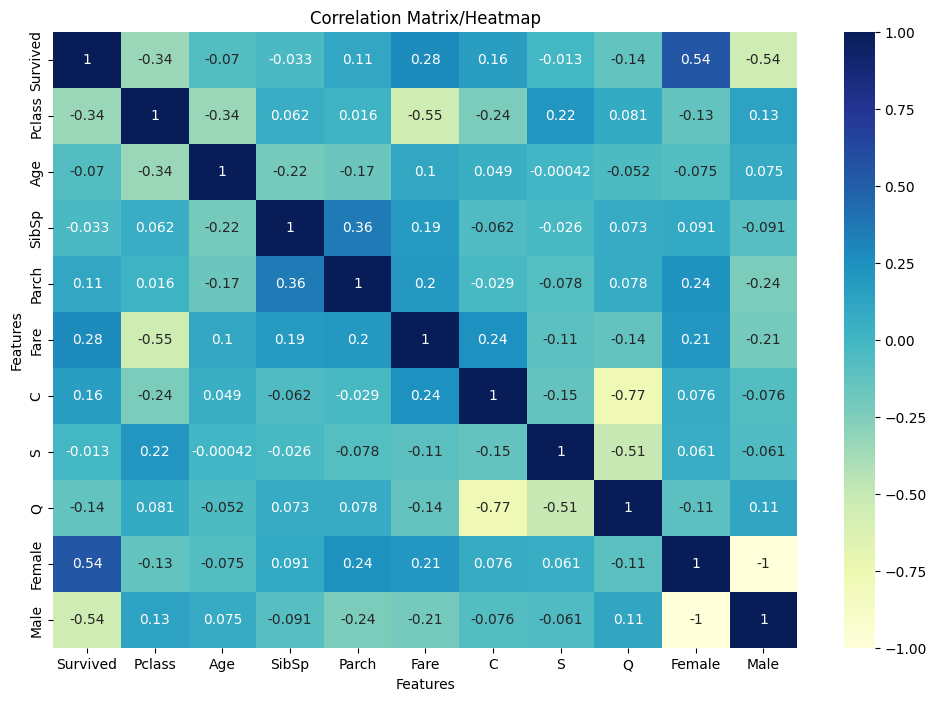

In [795]:
# Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(strat_train_set.corr(), cmap="YlGnBu", annot=True)
plt.title("Correlation Matrix/Heatmap")
plt.ylabel("Features")
plt.xlabel("Features")
plt.show()

**The key takeaway from this heat map is that there are many features that are somewhat correlated with survival rate. From this heatmap, I am able to tell that being a female rather than a male increased the survival rate of passengers. Another thing that is worth mentioning is that there is a negative correlation between Pclass and survival. This means people in lower number Pclasses(1st class) were more likely able to survive. The amount paid for the fair also seemed to correlate to survival rates. There was a positive correlation meaning that the more money you paid to be on the Titanic, the higher the chance you will survive. There was also a slight positive correlation between embarking from Cherbourg and survival rate meaning that people that embarked from Cherbourg were able to have a slightly higher chance at survival; however, after some further digging, it is revealed that there is a positive correlation between Cherbourg passengers and fare prices. This means that passengers from Cherbourg paid more money which was correlated with greater survival chance.**

(3 pts) Create a box and whisker plot for loan_amounts if using the Lending Club dataset and fare if using the Titanic dataset. How do you handle the null values? What does this box and whisker plot show you?

<function matplotlib.pyplot.show(close=None, block=None)>

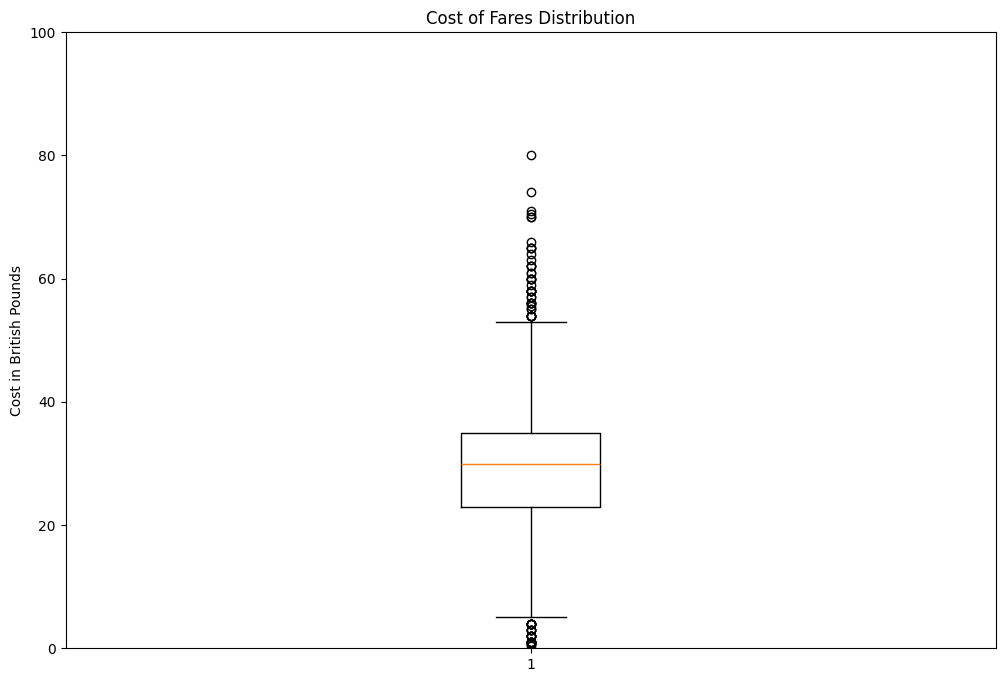

In [796]:
# Box and Whisker Plot

plt.figure(figsize= (12,8))
plt.boxplot(strat_train_set["Age"])
plt.title("Cost of Fares Distribution")
plt.ylabel('Cost in British Pounds')
plt.ylim(0,100)

plt.show

**I do not think there were null values for the 'Fare' column, but the way I handeled the null values for this data set is that I imported the AgeImputer module from sklearn in order to give the rows in the 'Age' column with null values a value through finding the mean age.**

**The box and whisker plot shows me that the median price for the Titanic is probably around 30 British Pounds. The majority of the tickets were priced between 35 and 22 British Pounds. I can tell that there were quite a few people that paid quite a bit more than the upper extreme price of around 55 British Pounds. Lastly, there were also some passengers who paid below the lower extreme of around 5 British Pounds.**

(5 pts) If using the Lending Club dataset: create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. If using the Titanic dataset: create a new column called age_bin that groups people into at least 4 age ranges. 
    
    Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in markdown. (use a timer to determine performance: check useful references below to see how timers work) 

In [797]:
# Timer for the code

start = perf_counter_ns() 

def ages_grouped_npwhere(strat_train_set, ages = 'Age'):
        strat_train_set["Ages Grouped (np.where)"] = np.where(strat_train_set[ages]<= 12, "Child", 
                np.where(strat_train_set[ages]<= 17, "Teen",
                np.where(strat_train_set[ages]<= 64, "Adult",
                        "Senior")))
        return strat_train_set

execute = ages_grouped_npwhere(strat_train_set)

execute

stop = perf_counter_ns()

print("Elapsed time during the whole program", 
      stop-start, 'ns') 

Elapsed time during the whole program 918400 ns


In [798]:
# Timer for the code

start = perf_counter_ns() 

def ages_grouped_lambda(strat_train_set, aged = 'Age'):
    
    strat_train_set["Ages Grouped (Lambda)"] = strat_train_set[aged].apply(lambda x: 'Child' if x <= 12 
                                                                        else 'Teen' if x <= 17 
                                                                        else 'Adult' if x <= 64 
                                                                        else 'Senior')
    
    return strat_train_set

executed = ages_grouped_lambda(strat_train_set)

executed

stop = perf_counter_ns()

print("Elapsed time during the whole program", 
      stop-start, 'ns') 

Elapsed time during the whole program 988000 ns


**After running the functions 5 times each, the average time for the np.where function to run fully was 816,500 ns. The average runtime for the lambda function was 551,260 ns; therefore, using the lambda function led to a 32.485% decrease in execution time when compared to the np.where function.**

(3 pts) If using the Lending Club dataset create subplot histograms to show if loan_amounts differ by region. If using the Titanic dataset, create subplot histograms to show how fares differ by age_bin. 
    
    Summarize your findings in under 200 words.

In [799]:
# Create separate data frames

child_df = strat_train_set.loc[strat_train_set["Ages Grouped (np.where)"]=="Child"]
teen_df = strat_train_set.loc[strat_train_set["Ages Grouped (np.where)"]=="Teen"]
adult_df = strat_train_set.loc[strat_train_set["Ages Grouped (np.where)"]=="Adult"]
senior_df = strat_train_set.loc[strat_train_set["Ages Grouped (np.where)"]=="Senior"]

Text(0, 0.5, 'Frequency')

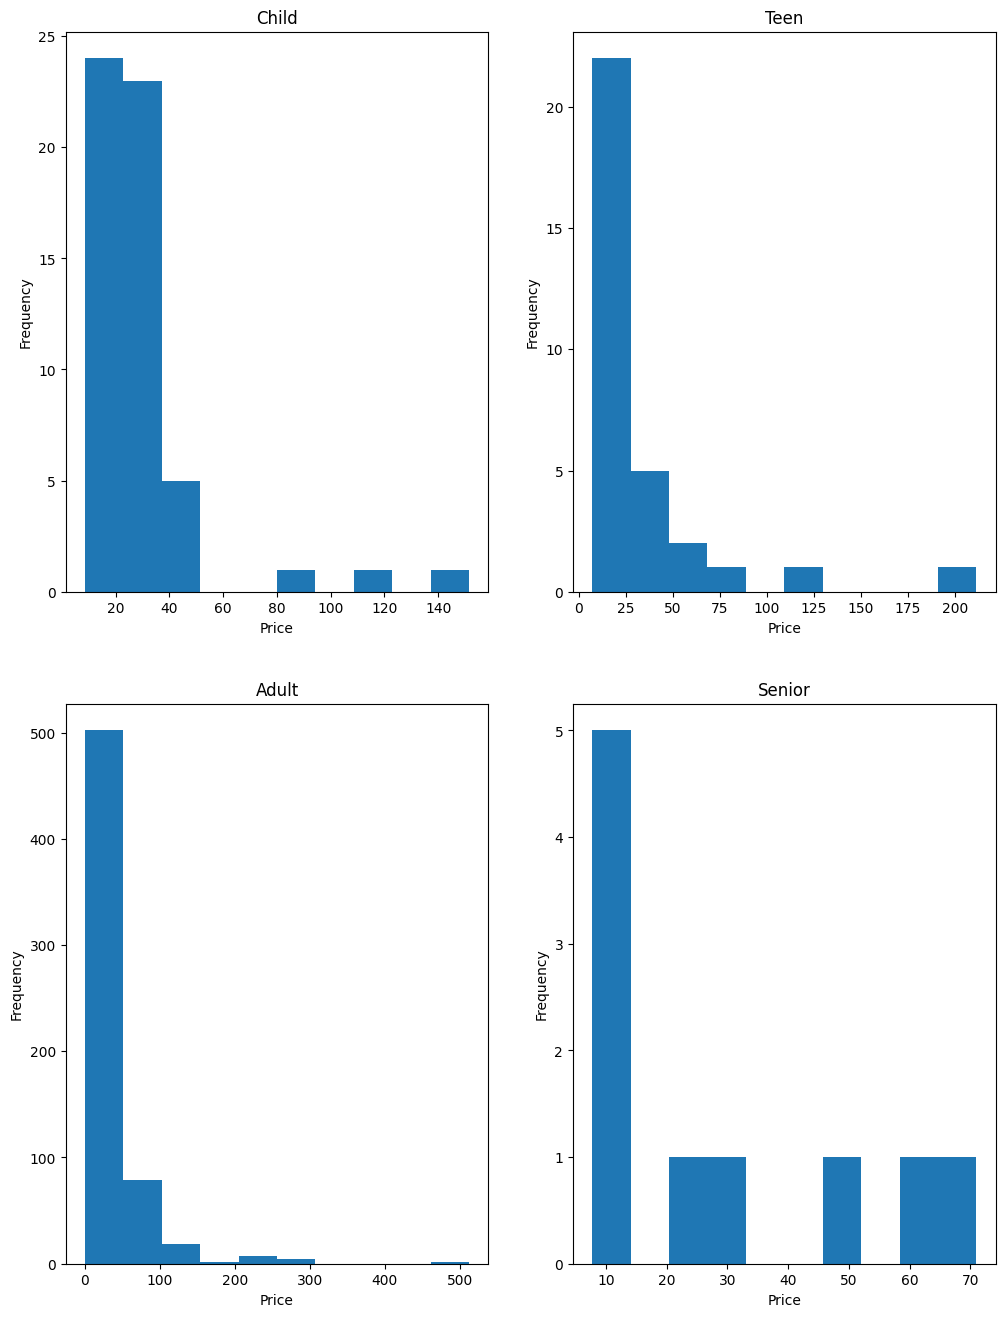

In [800]:
# Create Subplots

plt.figure(figsize= (12,16))

c = child_df['Fare']
plt.subplot(2,2,1)
plt.hist(c)
plt.title("Child")
plt.xlabel("Price")
plt.ylabel("Frequency")

t = teen_df['Fare']
plt.subplot(2,2,2)
plt.hist(t)
plt.title("Teen")
plt.xlabel("Price")
plt.ylabel("Frequency")

a = adult_df['Fare']
plt.subplot(2,2,3)
plt.hist(a)
plt.title("Adult")
plt.xlabel("Price")
plt.ylabel("Frequency")

s = senior_df['Fare']
plt.subplot(2,2,4)
plt.hist(s)
plt.title("Senior")
plt.xlabel("Price")
plt.ylabel("Frequency")

**The first thing that can be noticed within this set of graphs is that there are way more individuals within the "Adult" group than within the other groups. This is likely because the "Adult" age range is the largest when compared to other age groups. When looking at the histograms it looks like the majority of fare prices were under 50 British Pounds. We can also see that proportionally, individuals within the "Senior" age group are more likely to pay more than 50 British Pounds with about 29% of them paying more than 50 British Pounds. Another thing that can be easily noticed is that all the histograms are visibly skewed right. This means that there are individuals who pay a lot more money than the average person who rode on the Titanic. Lastly, there is a noticeable amount of individuals within the "Child" and "Teen" age groups that pay above 100 British Pounds to be on the Titanic which could be attributed to their fares being paid by their parents.**